<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Linear_Regression_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [2]:
x = np.random.rand(500)
x[:5]

array([0.18055934, 0.5247075 , 0.70548363, 0.25554882, 0.54120122])

In [3]:
m = 2 # slope or weight
c = 3 # coffecient or bias

In [4]:
noise = np.random.randn(500)/4
noise[:5]

array([ 0.53137228, -0.27243415,  0.47790081, -0.51510955, -0.16891957])

In [5]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

array([3.89249096, 3.77698084, 4.88886808, 2.9959881 , 3.91348287])

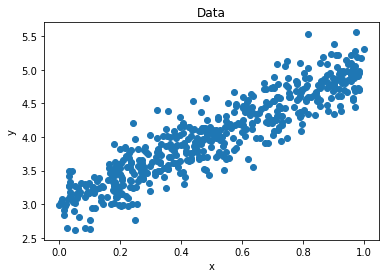

In [6]:
#Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.1806, 0.5247, 0.7055, 0.2555, 0.5412], dtype=torch.float64)
tensor([3.8925, 3.7770, 4.8889, 2.9960, 3.9135], dtype=torch.float64)


In [8]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [9]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)


In [10]:
print(targets[:5])

tensor([[3.8925],
        [3.7770],
        [4.8889],
        [2.9960],
        [3.9135]])


In [11]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

Parameter containing:
tensor([[0.6656]], requires_grad=True)
Parameter containing:
tensor([0.3498], requires_grad=True)


In [12]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.6656]], requires_grad=True), Parameter containing:
 tensor([0.3498], requires_grad=True)]

In [13]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(11.3400, grad_fn=<MseLossBackward0>)


In [14]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [15]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)

Epoch [10/310], Loss: 6.6995


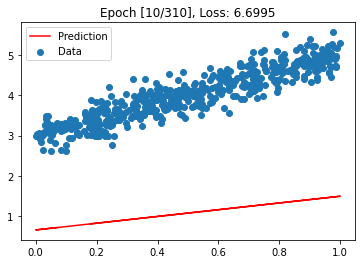

Epoch [20/310], Loss: 5.3005


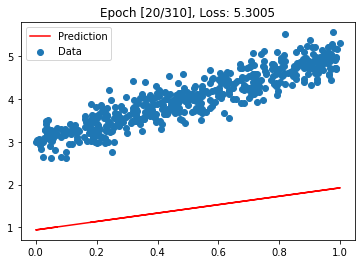

Epoch [30/310], Loss: 4.2044


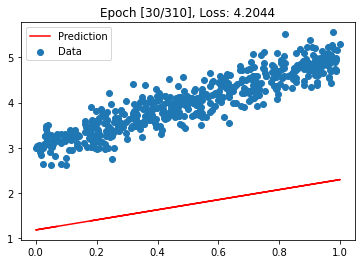

Epoch [40/310], Loss: 3.3445


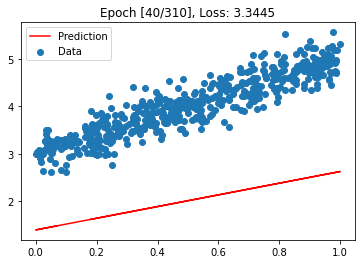

Epoch [50/310], Loss: 2.6688


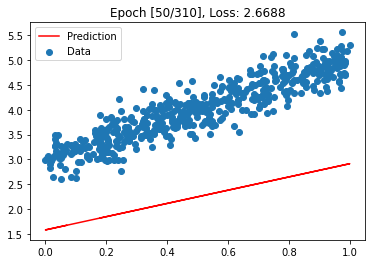

Epoch [60/310], Loss: 2.1371


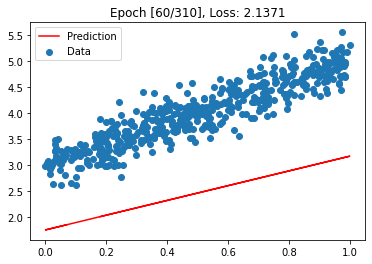

Epoch [70/310], Loss: 1.7178


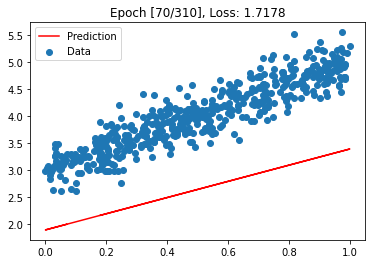

Epoch [80/310], Loss: 1.3866


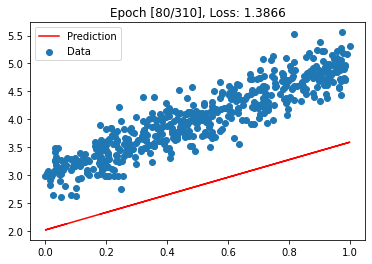

Epoch [90/310], Loss: 1.1243


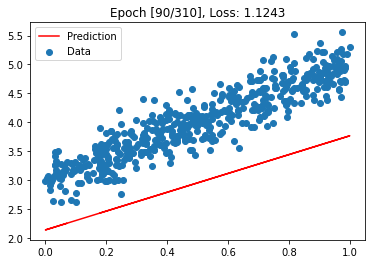

Epoch [100/310], Loss: 0.9162


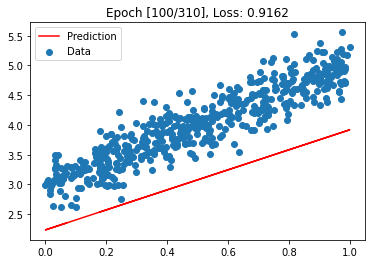

Epoch [110/310], Loss: 0.7505


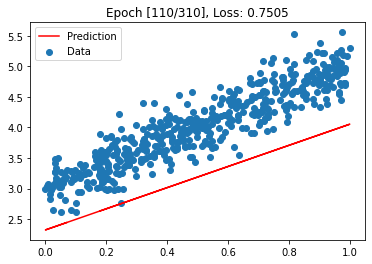

Epoch [120/310], Loss: 0.6183


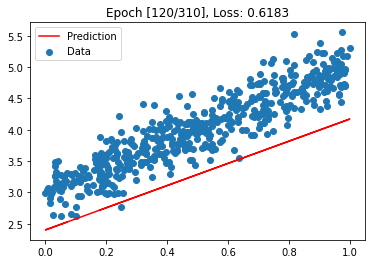

Epoch [130/310], Loss: 0.5126


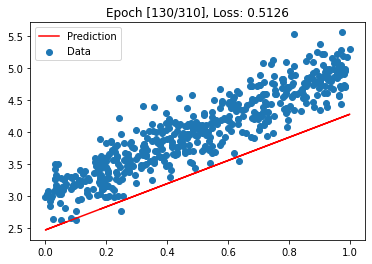

Epoch [140/310], Loss: 0.4276


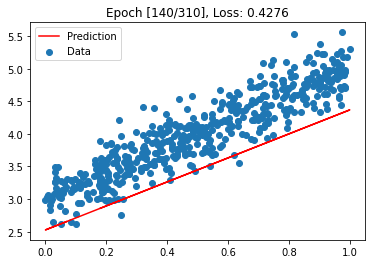

Epoch [150/310], Loss: 0.3592


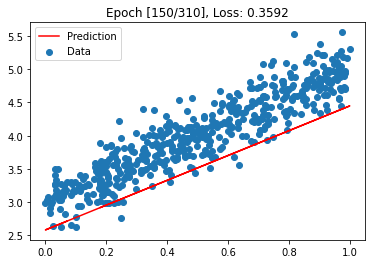

Epoch [160/310], Loss: 0.3039


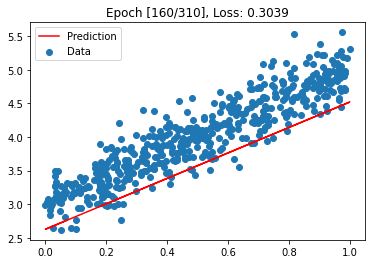

Epoch [170/310], Loss: 0.2591


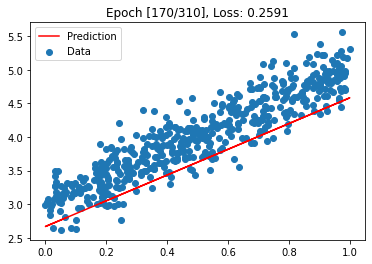

Epoch [180/310], Loss: 0.2225


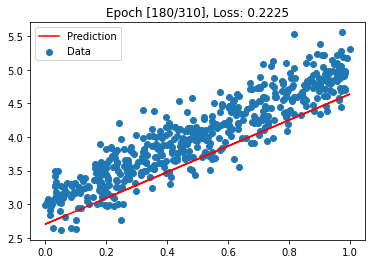

Epoch [190/310], Loss: 0.1926


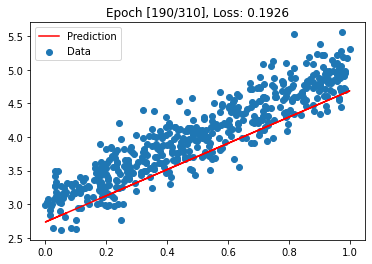

Epoch [200/310], Loss: 0.1681


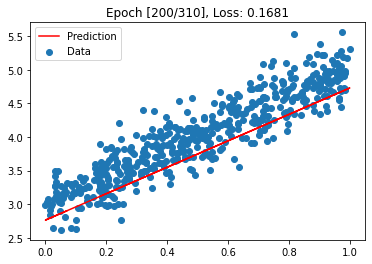

Epoch [210/310], Loss: 0.1479


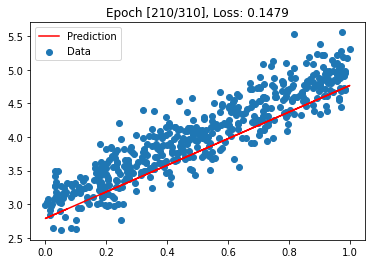

Epoch [220/310], Loss: 0.1311


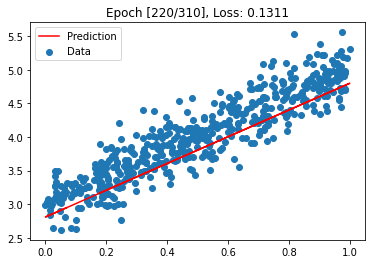

Epoch [230/310], Loss: 0.1172


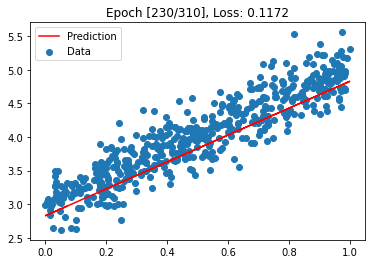

Epoch [240/310], Loss: 0.1056


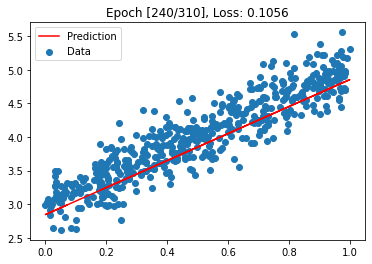

Epoch [250/310], Loss: 0.0959


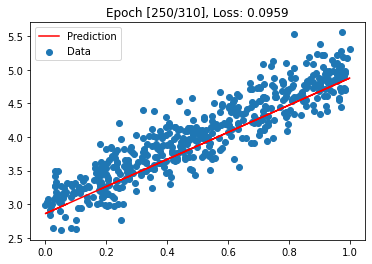

Epoch [260/310], Loss: 0.0877


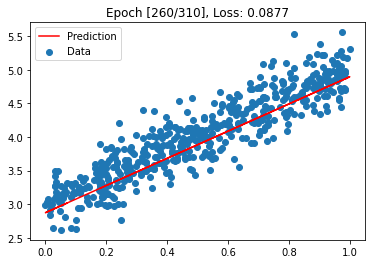

Epoch [270/310], Loss: 0.0808


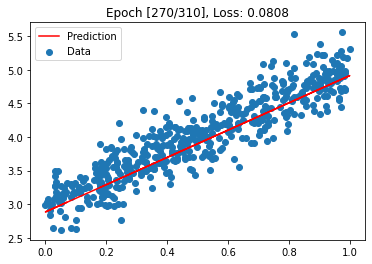

Epoch [280/310], Loss: 0.0749


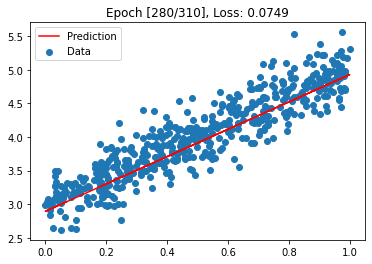

Epoch [290/310], Loss: 0.0699


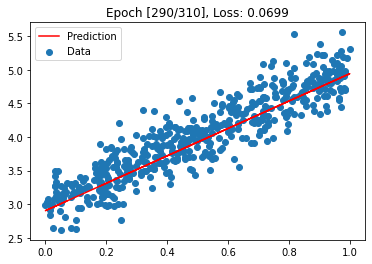

Epoch [300/310], Loss: 0.0657


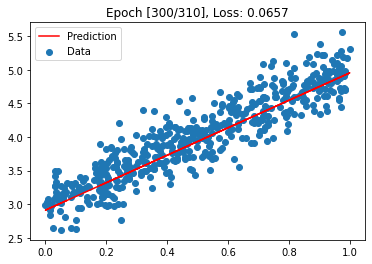

Epoch [310/310], Loss: 0.0621


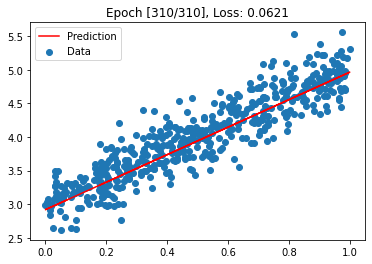

In [16]:
fit(310, model, loss_fn, opt, inputs, targets, )